# Financial Analysis

This Python script is designed as a comprehensive tool for teaching fundamentals of investment analysis and decision-making. The script assumes all investments are discounted to year 0 (cash_flows[0]).

Its functionalities include:

> ### Financial metrics calculation:

>> **Net Present Value (NPV)**: Measures the profitability of an investment, considering the time value of money.<br>
>> **Internal Rate of Return (IRR)**: Determines the discount rate at which the NPV of cash flows equals zero.<br>
>> **Simple Payback Period (SPB)**: Calculates how long it takes to recover the initial investment without discounting future cash flows.<br>
>> **Discounted Payback Period (DPP)**: Accounts for the time value of money while determining the payback period.<br>
>> **Profitability Index (PI)**: Indicates the return per unit of investment.<br>

> ### Visualization of Results:

>> **Discounted Cash Flows**: A bar chart showing the present value of each cash flow.<br>
>> **Cumulative Discounted Cash Flows**: A line chart highlighting the break-even point.<br>
>> **NPV Sensitivity Analysis**: A line chart that demonstrates how NPV changes with varying discount rates, helping to assess the robustness of the investment under different scenarios.<br>

> ### Integrated Output:

>> Presents all calculated metrics in a clear, tabular format.<br>

This script helps determine whether an investment is financially viable and provides tools to analyze its sensitivity to changes in discount rate assumptions.

Utilidad con fines docentes<br>
@author: Fernando García Bastante<br>
Universidad de Vigo


In [1]:
%pwd  # checking the path

'C:\\Users\\usuario\\SynologyDrive\\ASIGNATURAS\\MASTER\\herramientas_libres\\works\\analisis_económico'

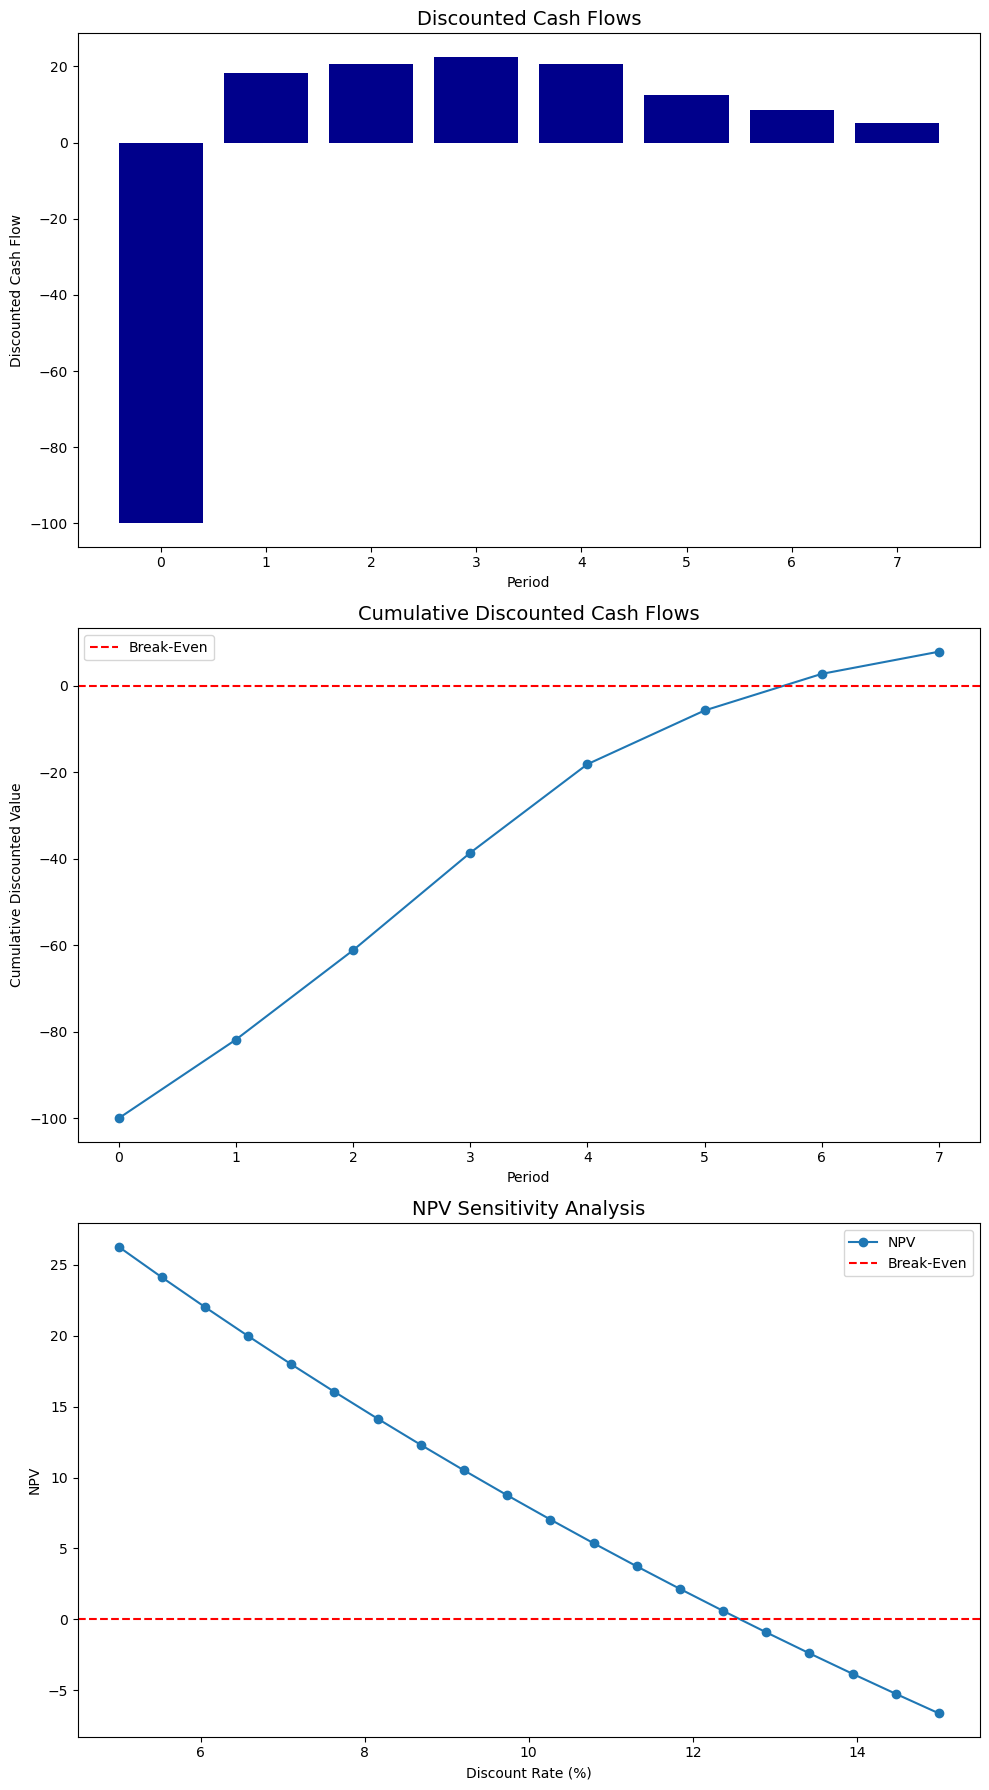


Financial Analysis Results:

                    Indicator      Value
      Net Present Value (NPV)       7.89
Internal Rate of Return (IRR)     12.57%
        Simple Payback Period 3.83 years
    Discounted Payback Period 5.67 years
     Profitability Index (PI)       1.08


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy_financial as npf

def calculate_discounted_cash_flows(cash_flows: list[float], rate: float) -> tuple[list[float], list[float]]:
    """Calculates discounted cash flows and their cumulative values."""
    discounted_cf = [cf / (1 + rate) ** t for t, cf in enumerate(cash_flows)]
    cumulative_discounted_cf = np.cumsum(discounted_cf)
    return discounted_cf, cumulative_discounted_cf

def calculate_npv(rate: float, cash_flows: list[float]) -> float:
    """Calculates the Net Present Value (NPV)."""
    return npf.npv(rate, cash_flows)

def calculate_irr(cash_flows: list[float]) -> float:
    """Calculates the Internal Rate of Return (IRR)."""
    return npf.irr(cash_flows)

def calculate_discounted_payback(cash_flows: list[float], rate: float) -> float:
    """Calculates the Discounted Payback Period (DPP)."""
    discounted_cf, cumulative_discounted_cf = calculate_discounted_cash_flows(cash_flows, rate)
    for t in range(1, len(cumulative_discounted_cf)):
        if cumulative_discounted_cf[t] >= 0:
            # Interpolate between periods t-1 and t
            return t - 1 + (0 - cumulative_discounted_cf[t - 1]) / (cumulative_discounted_cf[t] - cumulative_discounted_cf[t - 1])
    return None

def calculate_profitability_index(npv: float, investment: float) -> float:
    """Calculates the Profitability Index (PI)."""
    return (npv + abs(investment)) / abs(investment)

def calculate_simple_payback(cash_flows: list[float]) -> float:
    """Calculates the Simple Payback Period."""
    cumulative = np.cumsum(cash_flows)
    return next((t - 1 + (0 - cumulative[t - 1]) / (cumulative[t] - cumulative[t - 1]) for t in range(1, len(cumulative)) if cumulative[t] >= 0), None)

def sensitivity_analysis(cash_flows: list[float], rates: list[float]) -> pd.DataFrame:
    """Generates a DataFrame for NPV sensitivity analysis."""
    results = {rate: calculate_npv(rate, cash_flows) for rate in rates}
    return pd.DataFrame.from_dict(results, orient='index', columns=['NPV'])

def plot_analysis(cash_flows: list[float], discount_rate: float, rates_for_sensitivity: list[float]) -> None:
    """Generates plots for financial analysis."""
    discounted_cf, cumulative_discounted_cf = calculate_discounted_cash_flows(cash_flows, discount_rate)
    sensitivity = sensitivity_analysis(cash_flows, rates_for_sensitivity)

    fig, axes = plt.subplots(3, 1, figsize=(10, 18))

    axes[0].bar(range(len(cash_flows)), discounted_cf, color='darkblue')
    axes[0].set_title("Discounted Cash Flows", fontsize=14)
    axes[0].set_xlabel("Period")
    axes[0].set_ylabel("Discounted Cash Flow")

    axes[1].plot(range(len(cumulative_discounted_cf)), cumulative_discounted_cf, marker="o")
    axes[1].axhline(0, color="red", linestyle="--", label="Break-Even")
    axes[1].set_title("Cumulative Discounted Cash Flows", fontsize=14)
    axes[1].set_xlabel("Period")
    axes[1].set_ylabel("Cumulative Discounted Value")
    axes[1].legend()

    axes[2].plot(100 * sensitivity.index, sensitivity["NPV"], marker="o", label="NPV")
    axes[2].axhline(0, color="red", linestyle="--", label="Break-Even")
    axes[2].set_title("NPV Sensitivity Analysis", fontsize=14)
    axes[2].set_xlabel("Discount Rate (%)")
    axes[2].set_ylabel("NPV")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

def perform_analysis(cash_flows: list[float], discount_rate: float, rates_for_sensitivity: list[float]) -> None:
    """Performs calculations and displays results."""
    npv = calculate_npv(discount_rate, cash_flows)
    irr = calculate_irr(cash_flows)
    apb = calculate_discounted_payback(cash_flows, discount_rate)
    pi = calculate_profitability_index(npv, cash_flows[0])
    spb = calculate_simple_payback(cash_flows)
    sensitivity = sensitivity_analysis(cash_flows, rates_for_sensitivity)
    discounted_cf, cumulative_discounted_cf = calculate_discounted_cash_flows(cash_flows, discount_rate)
    
    plot_analysis(cash_flows, discount_rate, rates_for_sensitivity)

    results = pd.DataFrame({
        "Indicator": ["Net Present Value (NPV)", "Internal Rate of Return (IRR)", "Simple Payback Period", "Discounted Payback Period", "Profitability Index (PI)"],
        "Value": [
            f"{npv:.2f}",
            f"{irr * 100:.2f}%",  # Convert IRR to percentage
            f"{spb:.2f} years" if spb else "Not recovered",
            f"{apb:.2f} years" if apb else "Not recovered",
            f"{pi:.2f}"
        ]
    })

    print("\nFinancial Analysis Results:\n")
    print(results.to_string(index=False))


if __name__ == "__main__":
    cash_flows = [-100, 20, 25, 30, 30, 20, 15, 10]  # Cash flows in units to be set by the user, vg M€/year
    discount_rate = 0.1  # Discount rate per period of cash_flow
    rates_for_sensitivity = np.linspace(discount_rate * 0.5, discount_rate * 1.5, 20)  # Rates for sensitivity analysis

    perform_analysis(cash_flows, discount_rate, rates_for_sensitivity)